# MATH 6397 - Computational Challenge 2
## Quasi-stationary distributions in the birth-death model
    
    
**Group 2:** Thuyen (presenter), Danial, Manoj and Daniel.




## Computational Results


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from numba import jit
import seaborn as sns
sns.set()
# sns.set(style="whitegrid")


# Function: Change of Population
@jit(nopython=True)
def changePop(b, d):
    s = np.random.random_sample()
    if s < b:
        return 1
    elif s > (b+d):
        return 0
    else:
        return -1


# Function: Find Probability of Birth/Dearth/None
@jit(nopython=True)
def findProp(currentpop,r,K):
    b = r*(currentpop - np.power(currentpop, 2)/(2*K))
    d = r*np.power(currentpop, 2)/(2*K)
    return b, d


# Function: Generate One Population Trajectory
@jit(nopython=True)
def popTrajectory(endtime,r,K,initpop):
    pop = np.zeros(t)
    pop[0] = initpop
    for k in range(endtime-1):
        if pop[k] < 1:
            break
        else:
            b, d = findProp(pop[k],r,K)
            pop[k+1] = pop[k] + changePop(b, d)
    return pop


# Function: Extinction time
@jit(nopython=True)
def extinctionTime(pop,r1,K1):
    extime = 0
    while pop > 0:
        extime += 1
        b, d = findProp(pop,r1,K1)
        pop += changePop(b, d)
    return extime


# Function: Analytical Extinction Time
@jit(nopython=True)
def anaExtinctionTime(r,K,initpop):
    N = 2*K
    pop = np.arange(0,N+1)
    b = r*(pop - np.power(pop,2)/N)
    d = r*np.power(pop,2)/N
    ex = 0
    for i in range(initpop):
        for j in range(i+2,N+1):
            ex = ex + 1/d[i+1] + np.prod(b[i+1:j])/np.prod(d[i+1:j+1])
    return ex

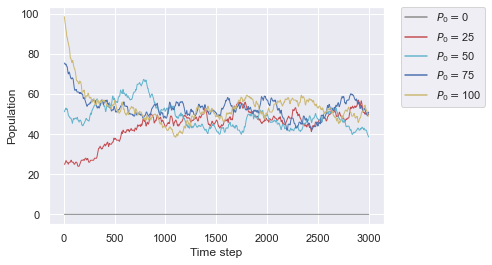

Computational time is 2.7037999629974365 seconds.


In [2]:
# Generate and plot some population trajectories
# --- Intial Parameters
r = 0.004 
K = 50     # Maximum population size (capacity) is 2K
t = 3000   # End time

aP0 = [0, 25, 50, 75, 100]  # Initial population

start2 = time.time()

#--- Plot
current_palette = sns.color_palette()
for P0 in aP0:
    pop = popTrajectory(t, r, K, P0)
    tm = np.linspace(0, t-1, t)
    time_pop = pd.DataFrame(pop, tm, ['$P_0=$%g'%(P0)])
    time_pop = time_pop.rolling(7).mean()
    ax = sns.lineplot(data=time_pop, palette=[current_palette[np.random.randint(0,len(current_palette))]], linewidth=1)

ax.set(xlabel='Time step', ylabel='Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig = ax.get_figure()
fig.savefig("1-1-PopulationTrajectories.png") 

end2 = time.time()

print('Computational time is {t} seconds.'.format(t=end2-start2))

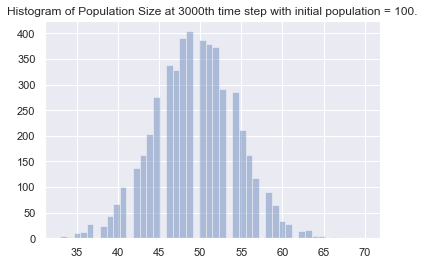

Computational time is 1.1888515949249268 seconds.


In [3]:
#--- Histogram of population time at t=3000
N_trial = 5000
initpop = 100

start1 = time.time()

s = []
for i in range(N_trial):
    pop = popTrajectory(t, r, K, initpop)
    s.append(pop[t-1])

pop_hist = sns.distplot(s, hist=True, kde=False)
plt.title('Histogram of Population Size at {T}th time step with initial population = {P}.'.format(T=t,P=P0))
# plt.legend(loc="upper left")
plt.show()

fig = pop_hist.get_figure()
fig.savefig("1-2-Histogram.png") 

end1 = time.time()

print('Computational time is {t} seconds.'.format(t=end1-start1))

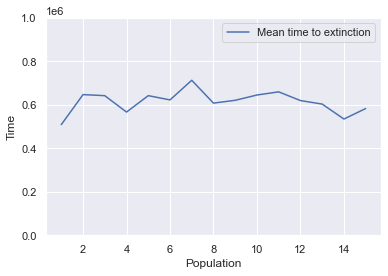

Computational time is 40.91355061531067 seconds.


In [4]:
# Plot the mean of extinction times
#--- Intial Parameters

r = 0.015
K = 8

start = time.time()

p0 = np.arange(1,2*K) # generate the initial population vector
lp0 = len(p0)

ntrial = 100 # number of simulation for each element of p0

mean_extime = np.zeros(lp0)
for i in range(lp0):
    aextime = np.zeros(ntrial)
    for j in range(ntrial):
        aextime[j] = extinctionTime(p0[i],r,K)
    
    mean_extime[i] = np.mean(aextime)

end = time.time()

pop_meanex = pd.DataFrame(mean_extime,p0,['Mean time to extinction'])
plot_meanex = sns.lineplot(data=pop_meanex)

plot_meanex.set(xlabel='Population', ylabel='Time')
plot_meanex.set(ylim=(0, 1000000))
plt.show()

fig = plot_meanex.get_figure()
fig.savefig("2-1-ExtinctionTime.png") 

print('Computational time is {t} seconds.'.format(t=end-start))

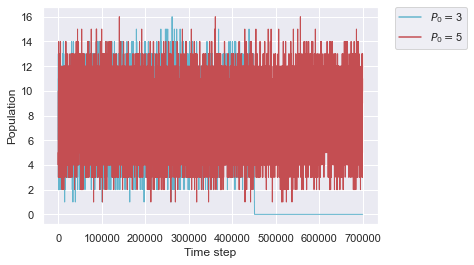

Computational time is 82.33857536315918 seconds.


In [3]:
# Generate and plot some population trajectories that may extinct
# --- Intial Parameters

r = 0.015
K = 8
t = 700000


aP0 = [3,5]

start3 = time.time()

#--- Plot
current_palette = sns.color_palette()
for P0 in aP0:
    pop = popTrajectory(t, r, K, P0)
    tm = np.linspace(0, t-1, t)
    time_pop = pd.DataFrame(pop, tm, ['$P_0=$%g'%(P0)])
#     time_pop = time_pop.rolling(100).mean()
    ax = sns.lineplot(data=time_pop, palette=[current_palette[np.random.randint(0,len(current_palette))]], linewidth=2.5)

ax.set(xlabel='Time step', ylabel='Population')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig = ax.get_figure()
fig.savefig("2-2-ExtinctionTrajectories.png") 

end3 = time.time()

print('Computational time is {t} seconds.'.format(t=end3-start3))

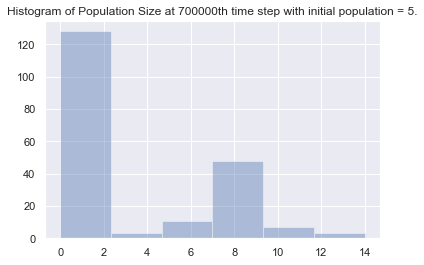

Computational time is 4.415664196014404 seconds.


In [4]:
#--- Histogram of population time at t=800000
N_trial = 200
initpop = 4

start4 = time.time()

s = []
for i in range(N_trial):
    pop = popTrajectory(t, r, K, initpop)
    s.append(pop[t-1])

pop_hist = sns.distplot(s, hist=True, kde=False)
plt.title('Histogram of Population Size at {T}th time step with initial population = {P}.'.format(T=t,P=P0))
plt.show()

fig = pop_hist.get_figure()
fig.savefig("2-3-Histogram.png") 

end4 = time.time()

print('Computational time is {t} seconds.'.format(t=end4-start4))

## Theoretical Results

*This is a joint work of Group 1 (Triet Duong) and Group 2 (Thuyen Dang).*


Given a birth-death process with transition probability:
$$\begin{align}
\label{1}
P(X_{t+1} = j+1 | X_{t} = j) 
&= b_{j}\\
P(X_{t+1} = j-1 | X_{t} = j) 
&= d_{j}\\
P(X_{t+1} = j | X_{t} = j) 
&= 1 - (b_{j}+d_{j}).
\end{align}$$

Suppose the capacity $N = 2K$ for some integer $K > 0$. Moreover, we
assume the state 0 is absorbing (i.e., extinction) and state $N$ is
reflecting (i.e., when never the population reaches $2N$, the birth
probability $b_N = 0$).

Let $\mathbf{s}^0$ be the hitting time (or first passage time) defined
by 
$$\begin{align}
\label{eq:1}
  \mathbf{s}^{W} = \inf \{ t \ge 0 \colon X_{t} \in W \},
\end{align}$$
where $W$ is a subset of state space $\left\{ 0, \ldots, N
\right\}$. If the population at time $t = 0$ is $k$, then the
expectation of mean time to extinction is denoted by
$E_k[\mathbf{s}^0]$, which admits the explicit formula:
$$\begin{align}
\label{eq:2}
E_k [\mathbf{s}^0] = \sum_{i=0}^{k-1} \left( \frac{1}{d_{i+1}} +
  \sum_{j = i+2}^N \frac{b_{i+1} \cdots b_{j-1}}{d_{i+1}\cdots d_{j}}\right).
\end{align}$$

The formula can be proved rigorously by generating function, see
Chapter 5 of the book Wolfgang Woess, Denumerable Markov Chain.


*Remark.* The birth-death process has a continuous deterministic counterpart,
which is the logistic equation 
$$\begin{align}
\label{eq:3}
\frac{dn}{dt} = rn \left( 1 - \frac{n}{K} \right).
\end{align}$$
(Notice the similarity between the right hand side with $b_i - d_i =
ri (1 - i/K)$.) In the deterministic model, the population never
extincts if it's near the capacity $2K$. However, if one adds
randomness into this model, the theoretical result above says that
the population will become extinct eventually. 

In [9]:
# Expected time to extinction
r = 0.004
K = 50
initpop = 100

ex = anaExtinctionTime(r,K,initpop)
print('The expectation of extinction time is {t} time steps.'.format(t = ex))

The expectation of extinction time is 6.469670296402451e+30 time steps.


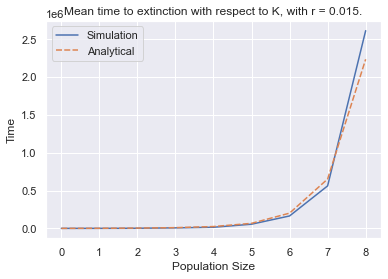

Computational time is 7.303473711013794 seconds.


In [14]:
# Plot the mean time the population reaches extinction with fixed r
r = 0.015
num_K = 9

num_trials = 50

X0 = []
final_pop = []
mean_time = []
mean_time_ex = []

start = time.time()

for j in range(num_K):
    n_time = []
    n_time_ex = []
    X0.append(j+1)
    for k in range(num_trials):
        x0 = np.random.randint(1, 2*j+2)
        i = extinctionTime(x0, r, j+1)
        ex = anaExtinctionTime(r, j+1, x0)
        n_time.append(max(i,0))
        n_time_ex.append(max(ex,0))
    mean_time.append(sum(n_time)/num_trials)
    mean_time_ex.append(sum(n_time_ex)/num_trials)
    
end = time.time()


pop_meanex = pd.DataFrame({
#     'Population Size K': X0,
    'Simulation': mean_time,
    'Analytical': mean_time_ex})

plot_meanex = sns.lineplot(data=pop_meanex)
plot_meanex.set(xlabel='Population Size', ylabel='Time')
plt.title('Mean time to extinction with respect to K, with r = {r0}.'.format(r0=r))
plt.show()

fig = plot_meanex.get_figure()
fig.savefig("3-1-ExtinctionTimeFixed_r.png") 

print('Computational time is {t} seconds.'.format(t=end-start))

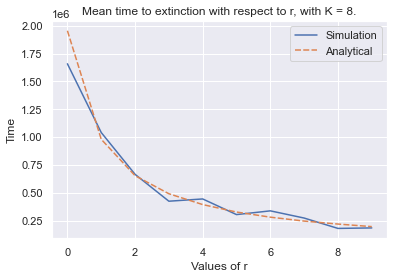

Computational time is 11.812384128570557 seconds.


In [15]:
# Plot the mean time the population reaches extinction with fixed K = 8
r = np.linspace(0.005,0.05,10)
K = 8

num_trials = 50

X0 = []
final_pop = []
mean_time = []
mean_time_ex = []

start = time.time()

for j in range(len(r)):
    n_time = []
    n_time_ex = []
    X0.append(r[j])
    for k in range(num_trials):
        x0 = np.random.randint(1,2*K+1)
        i = extinctionTime(x0,r[j],K)
        ex = anaExtinctionTime(r[j],K,x0)
        n_time.append(max(i,0))
        n_time_ex.append(max(ex,0))
    mean_time.append(sum(n_time)/num_trials)
    mean_time_ex.append(sum(n_time_ex)/num_trials)
    
end = time.time()


pop_meanex = pd.DataFrame({
#     'Population Size K': X0,
    'Simulation': mean_time,
    'Analytical': mean_time_ex})

plot_meanex = sns.lineplot(data=pop_meanex)
plot_meanex.set(xlabel='Values of r', ylabel='Time')
plt.title('Mean time to extinction with respect to r, with K = {K0}.'.format(K0=K))
plt.show()

fig = plot_meanex.get_figure()
fig.savefig("3-2-ExtinctionTimeFixed_r.png") 

print('Computational time is {t} seconds.'.format(t=end-start))